## Insurance Forecast for Medical Cost Personal Datasets using Linear Regression
### This dataset puts together sex of a patient, age, body mass index (bmi), the region of the US they live in, whether or not they are smokers and the number of children or dependents they have, to predict the charges of medical cost when they go to the hospital


### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Upload the data set and view the first 5 rows

In [2]:
df = pd.read_csv('medical cost.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### One hot encode male and female sexes

In [4]:
df.sex.replace('female', 0, inplace = True)
df.sex.replace('male', 1, inplace = True)

### Do the same for smoker column

In [5]:
df.smoker.replace('no', 0, inplace = True)
df.smoker.replace('yes', 1, inplace = True)

### Then view the distribution of the region column to see how they stuck up against each other. They're just about the same

In [6]:
df.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

### Take a look at how the changes look in the dataframe. I'll just have to place the region values with integers later, if I need to

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


### Check to see if there are there any null values?

In [8]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Let's start visualizing the data first by looking at how males and females compare to the charges.
#### The men have a larger range of charges even though the median for both sexes is around the same. 
#### I confirmed in the cell below that it wasn't because more men went to the hospital. It could just be that the range of issues they're dealing with incurred a more varied amount of charges than women.

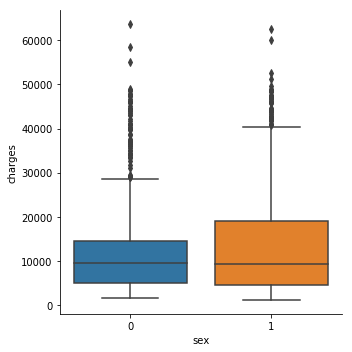

In [9]:
sns.catplot(x = 'sex', y = 'charges', data = df, kind = 'box')
# men are labeled 1, female are labeled 0

### The number of men are not outrageously more than the women, so it didn't play a role in the above graph

In [10]:
df.sex.value_counts()

1    676
0    662
Name: sex, dtype: int64

### Comparing the smoker column and the charges column reveals smokers are charged more than non-smokers

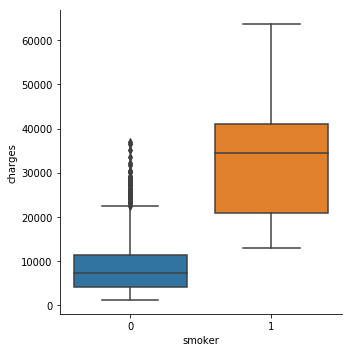

In [11]:
sns.catplot(x = 'smoker', y = 'charges', data = df, kind = 'box')

### This graph compares the bmi to the charges. It doesn't really reveal a trend, but it looks like there are two clusters.

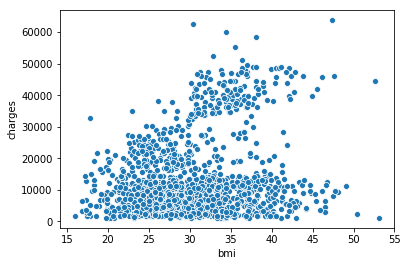

In [12]:
sns.scatterplot(df.bmi, df.charges, data = df)
# No clear trend, but there are 2 clusters that emerge: the bigger lower bottom and the upper one

### Highlighting the smokers show the distribution of smokers to non-smokers. The smokers reveal two clusters: those with low bmi's have lower charges compared to those with higher bmi's

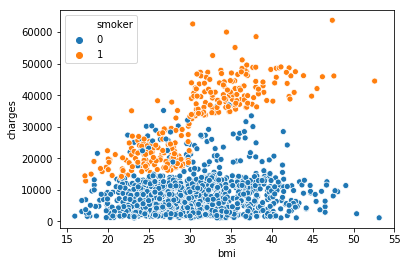

In [13]:
sns.scatterplot(df.bmi, df.charges, data = df, hue = 'smoker')
# There is a definite trend where the smokers are highlighted.

### Comparing the charges and the presence of children, there's no logical trend here. Those without children seem to have a median price as those with 3 and 4 children, so it's not much to go on

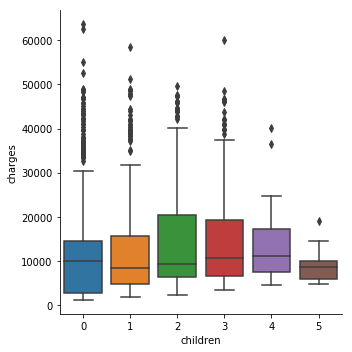

In [14]:
sns.catplot('children', 'charges', data = df, kind = 'box')

### For age and charges, the trend is the older the patient the higher the charge and that could be because old people have more diseases to deal with and therefore go to the hospital more often and incur more charges

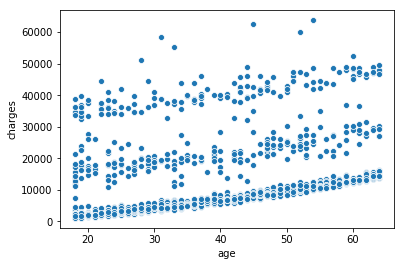

In [15]:
sns.scatterplot(df.age, df.charges, data = df)
# Generally, the charges are rising with age

### Highlighting the smoker status shows smokers have higher charges regardless of age

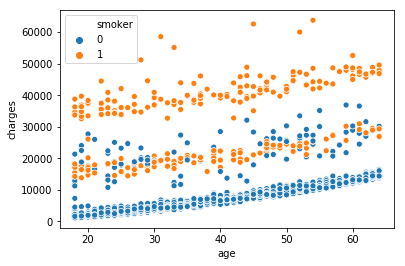

In [16]:
sns.scatterplot(df.age, df.charges, data = df, hue = 'smoker')

### The higher BMI's have darker circles, and the trend is higher charges for higher bmi, regardless of age

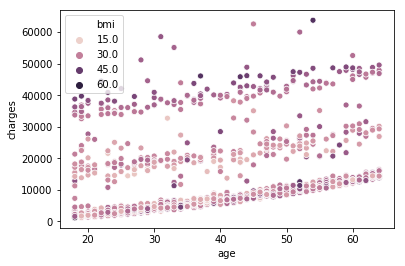

In [17]:
sns.scatterplot(df.age, df.charges, data = df, hue ='bmi')
#Generally, the higher bmi's have higher charges within the same age range

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


### When the sex is highlighted, there's no clear pattern where the charges are concerned


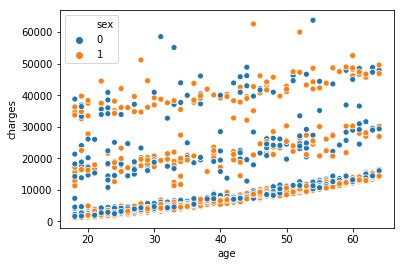

In [19]:
sns.scatterplot(df.age, df.charges, data = df, hue ='sex')
# I can't tell too much of a  pattern here, where there are children involved.

### The same for the presence of children; no clear trend

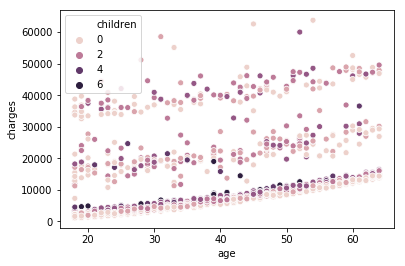

In [20]:
sns.scatterplot(df.age, df.charges, data = df, hue ='children')
# I can't tell too much of a  pattern here, where there are children involved.

### Or here, where region is highlighted,  no trend

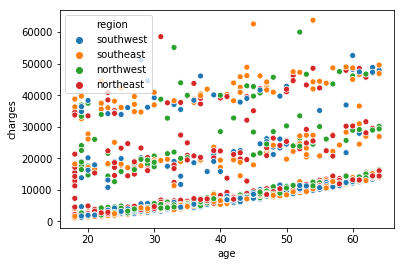

In [21]:
sns.scatterplot(df.age, df.charges, data = df, hue ='region')
#There's no pattern where it comes to region, either

### When region is view here, the median charge is the same across the board, meaning region is not playing a role in determining the charge 

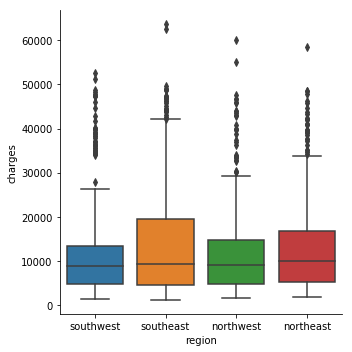

In [22]:
sns.catplot('region', 'charges', data = df, kind = 'box')
# Region doesn't seem to be playing a role

### I want to see the correlation between the different columns and get there I'll replace the region column with interger values 

In [23]:
df.region.replace('northeast', 0, inplace = True)
df.region.replace('northwest', 1, inplace = True)
df.region.replace('southeast', 2, inplace = True)
df.region.replace('southwest', 3, inplace = True)

## Getting the correlation of the dataset

In [24]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


### It'll be better if it's visualized. 
#### There's a stong correlation between smokers and the charges; age and bmi also have some correlation

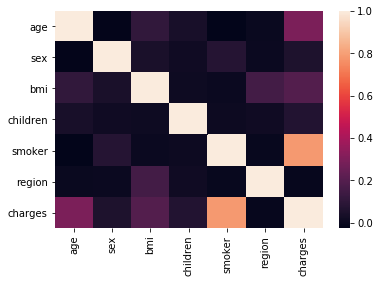

In [25]:
sns.heatmap(df.corr())
 

### Because sex and region do not appear to have a correlation, I'll drop them. The box plot for children with charges do show a slight correlation, so I will not drop it

In [26]:
df.drop(['sex','region'], axis = 1, inplace = True)

### Import training algorithms

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import PolynomialFeatures

### Getting the x and y dataframes

In [28]:
x = df.iloc[:, :-1]

In [29]:
x.head()

,age,bmi,children,smoker
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,3,0
3,33,22.705,0,0
4,32,28.880,0,0


In [30]:
y = df.iloc[:, -1:]

In [31]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


### Split data into training and testing sets

In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 1, test_size = 0.2)

### Prepare algorithms to begin training

In [33]:
lr = LinearRegression()
dt = DecisionTreeClassifier(random_state = 1)
gr = GradientBoostingRegressor(learning_rate = 0.1)
pr = PolynomialFeatures(degree = 2)

In [34]:
lr.fit(xtrain, ytrain)  ## Linear Regression
lr.score(xtrain, ytrain)
lr.score(xtest, ytest)

0.7611879389063602

In [35]:
gr.fit(xtrain, ytrain)  #Gradient Boosting Regressor
gr.score(xtrain, ytrain)
gr.score(xtest, ytest)

C:\Users\emf-a\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8771636127516754

In [36]:
pr = PolynomialFeatures (degree = 2)  # Polynomial Regression
x_poly = pr.fit_transform(x)

xtrain, xtest, ytrain, ytest = train_test_split(x_poly,y, random_state = 0, test_size = 0.2)

plr = lr.fit(xtrain,ytrain)

Y_train_pred = plr.predict(xtrain)
Y_test_pred = plr.predict(xtest)

print(plr.score(xtest, ytest))

0.8812595703345225


### I'll stack the training algorithms to improve the accuracy

In [37]:
estimators = [('gr', gr),('plr', plr)] #Gradient Boosting Regressor and PolynomialFeatures with linear Regression

In [38]:
sr = StackingRegressor(estimators=estimators)

In [39]:
sr.fit(xtrain, ytrain)
sr.score(xtrain, ytrain)
sr.score(xtest, ytest)

C:\Users\emf-a\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8957663997176403

### Second stacking algorithm

In [40]:
estimators = [('lr', lr),('gr', gr)] # Stacking Linear Regression and Gradient Boosting Regressor

In [41]:
sr = StackingRegressor(estimators=estimators)

In [42]:
sr.fit(xtrain, ytrain)
sr.score(xtrain, ytrain)
sr.score(xtest, ytest)

C:\Users\emf-a\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8953764344385526

### Conclusion: Sex and Region are not playing a role in determining charges!